# Boardex Graph 

Notebook to create graphs and visualise the graphs for the required adjacency matrix

In [20]:
import pandas as pd
import numpy as np

import networkx as nx

In [21]:
boardex_company_networks_us_df = pd.read_csv("raw_data/boardex_company_network_2011_2023.csv", index_col = 0)

In [22]:
boardex_company_networks_us_df.head()

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,LIFE TECHNOLOGIES CORP (Invitrogen Corp prior ...,Doctor Mahendra Rao,2010,2011,Scientific Advisor (Non-Brd),Vice President (Non-Brd),Quoted,401.0,...,Scientific Advisor,Non-Brd,NaN,2010,2011,2010-04-01,2015-01-01,2006-01-01,2011-06-01,Quoted
1,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,CONTRAFECT CORP (De-listed 11/2023),Doctor Steve Gilman,2019,2022,Independent Director (Brd) (SD),Vice Chairman (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2019,2022,2015-01-06,NaN,2019-04-02,2022-01-01,Quoted
2,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,Emisphere Technologies Inc,Alan Rubino,2016,2019,Independent Director (Brd) (SD),President/CEO/Secretary (Brd) (ED),Private,401.0,...,Independent Director,Brd,SD,2016,2019,2005-09-28,NaN,2016-06-25,2019-10-15,Quoted
3,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,Emisphere Technologies Inc,Alan Rubino,2012,2016,Independent Director (Brd) (SD),President/CEO (Brd) (ED),Private,401.0,...,Independent Director,Brd,SD,2012,2016,2005-09-28,NaN,2012-09-13,2016-06-25,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,AP PHARMA INC (De-listed 04/2011),Doctor Robert Zerbe,2006,2011,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2006,2011,2006-01-16,2012-10-04,2002-12-01,2011-04-01,Quoted


In [23]:
boardex_company_networks_us_df.columns

Index(['associationtype', 'boardname', 'companyname', 'directorname',
       'overlapyearstart', 'overlapyearend', 'role', 'associatedrole',
       'conncompanyorgtype', 'boardid', 'companyid', 'directorid', 'roletitle',
       'roleboardposition', 'roleedflag', 'overlapyearstart_int',
       'overlapyearend_int', 'startcompanydatestartrole',
       'startcompanydateendrole', 'conncompanydatestartrole',
       'conncompanydateendrole', 'orgtype'],
      dtype='object')

In [24]:
def get_filtered_graph_data(boardex_company_networks_us_df, year):

    filtered_data_df = boardex_company_networks_us_df[['boardid', 'companyid', 'directorid', 'overlapyearstart_int', 'overlapyearend_int' ]].drop_duplicates()
    # filtered_data_df['overlapyearend'].replace("Curr", 2024)
    # filtered_data_df['overlapyearend'] = pd.to_numeric(filtered_data_df['overlapyearend'], errors='coerce')

    # filter by year here
    graph_yearly_df = filtered_data_df[ (year >= filtered_data_df['overlapyearstart_int']) & (year <= filtered_data_df['overlapyearend_int'])]
    

    return graph_yearly_df

def create_adjacency_matrix_on_interlock_df(yearly_company_network_df):

    # Assuming you have your DataFrame boardex_company_networks_us_df already loaded
    G = nx.from_pandas_edgelist(yearly_company_network_df, 'boardid', 'companyid', edge_attr='directorid')

    # Generate Adjacency Matrix
    adj_matrix = nx.adjacency_matrix(G)

    # Get the node IDs from the graph
    node_ids = list(G.nodes())

    # Convert the adjacency matrix to a DataFrame
    adj_df = pd.DataFrame(adj_matrix.todense(), index=node_ids, columns=node_ids)

    return adj_df, adj_matrix, G

Create a dataset below for each year - as a dictionary

In [25]:
# create a list of dictionary for necessary dataframe as necessary

graph_details_lst = []

for year in range(2011,2024):

    # create dictionary for each year and get details required.
    record = dict()
    record["year"] = year


    graph_yearly_df = get_filtered_graph_data(boardex_company_networks_us_df, year)

    adj_df, adj_matrix, G = create_adjacency_matrix_on_interlock_df(graph_yearly_df)

    record["adj_matrix"] = adj_matrix
    record["adj_matrix_df"] = adj_df
    record["graph"] = G

    # get the graph centrality measures
    record["eigenvector_centrality"] = nx.eigenvector_centrality(G)

    record["degree_centrality"] = nx.degree_centrality(G)

    record["betweeness_centrality"] = nx.betweenness_centrality(G)

    # get clustering coefficient
    record["clustering_coefficient"] = nx.clustering(G)

    graph_details_lst.append(record)


In [26]:
graph_details_lst[0]["adj_matrix_df"]

,401.0,16904.0,2304.0,836011.0,811.0,467993.0,23208.0,32751.0,6357.0,24296.0,...,635869.0,645195.0,1590106.0,782219.0,943217.0,1295244.0,12242.0,1639582.0,1636098.0,1643723.0
401.0,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16904.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2304.0,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
836011.0,1,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
811.0,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295244.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12242.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1639582.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1636098.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Visualise each graph below

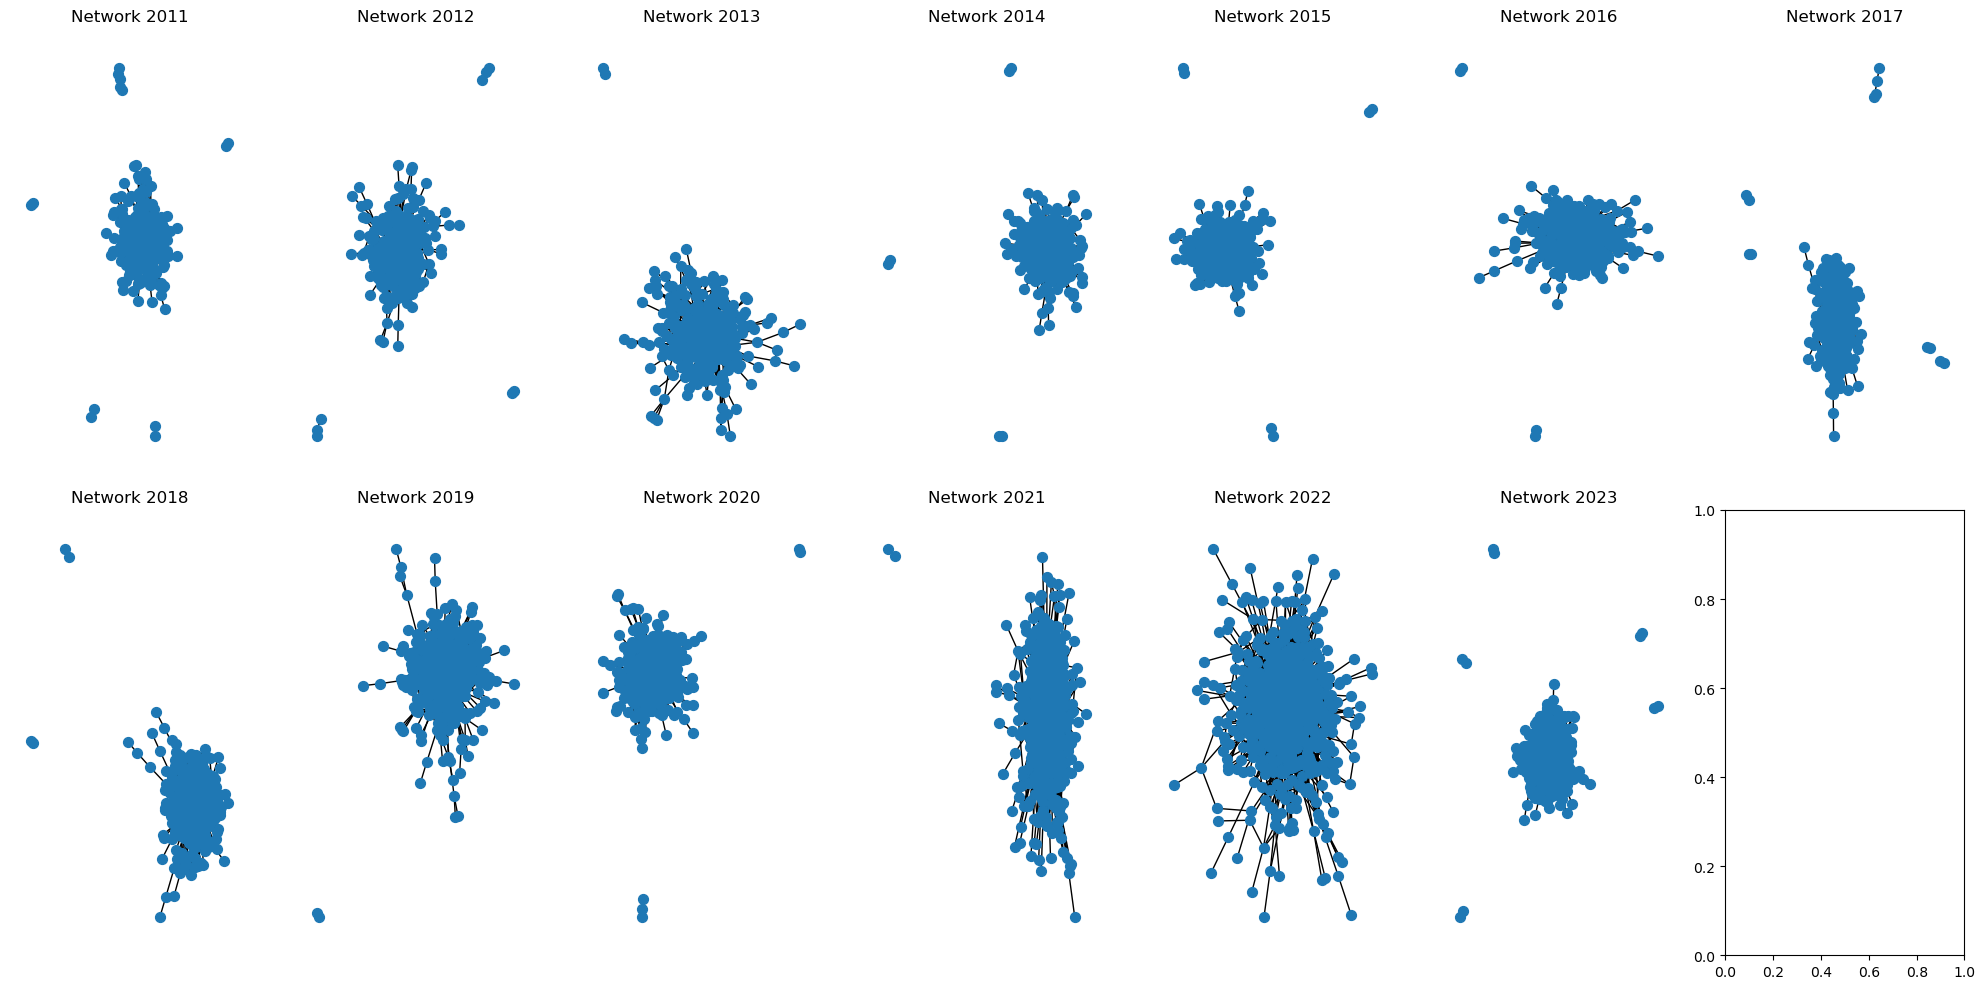

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# You should have graph_details_lst populated as per the given code.

# Set up the plotting grid
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))  # Adjust grid size according to the number of graphs
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through the graph details list and plot each graph
for i, record in enumerate(graph_details_lst):
    G = record["graph"]
    ax = axes[i]
    nx.draw(G, ax=ax, with_labels=False, node_size=50, font_size=8)
    ax.set_title(f"Network {record['year']}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Seems like they're different clusters so it is not that meaningful to create graphs using SBM here. So need to try something else instead, use the other approaches of Bayesian for quality control.

Use regression and clusters for this approach here, as that is the most meaningful, try other approaches here later.

In [28]:
graph_details_lst

[{'year': 2011,
  'adj_matrix': <Compressed Sparse Row sparse array of dtype 'int64'
  	with 1160 stored elements and shape (276, 276)>,
  'adj_matrix_df':            401.0      16904.0    2304.0     836011.0   811.0      467993.0   \
  401.0              0          1          1          1          0          0   
  16904.0            1          0          0          0          0          0   
  2304.0             1          0          0          1          1          0   
  836011.0           1          0          1          0          0          0   
  811.0              0          0          1          0          0          1   
  ...              ...        ...        ...        ...        ...        ...   
  1295244.0          0          0          0          0          0          0   
  12242.0            0          0          0          0          0          0   
  1639582.0          0          0          0          0          0          0   
  1636098.0          0          0   

In [29]:
pd.DataFrame(graph_details_lst)

,year,adj_matrix,adj_matrix_df,graph,eigenvector_centrality,degree_centrality,betweeness_centrality,clustering_coefficient
0,2011,<Compressed Sparse Row sparse array of dtype '...,401.0 16904.0 2304.0 83...,"(401.0, 16904.0, 2304.0, 836011.0, 811.0, 4679...","{401.0: 0.061780888564080434, 16904.0: 0.03686...","{401.0: 0.014545454545454545, 16904.0: 0.01090...","{401.0: 0.002452163344318792, 16904.0: 0.00073...","{401.0: 0.3333333333333333, 16904.0: 0.3333333..."
1,2012,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 836011.0 56...,"(401.0, 590430.0, 836011.0, 569.0, 480064.0, 2...","{401.0: 0.0057726058157520485, 590430.0: 0.001...","{401.0: 0.0072992700729927005, 590430.0: 0.010...","{401.0: 0.004240488756945534, 590430.0: 0.0013...","{401.0: 0, 590430.0: 0.3333333333333333, 83601..."
2,2013,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 836011.0 56...,"(401.0, 590430.0, 836011.0, 569.0, 480064.0, 2...","{401.0: 0.0053611960025675065, 590430.0: 0.001...","{401.0: 0.006191950464396285, 590430.0: 0.0092...","{401.0: 0.0014671737820862159, 590430.0: 0.000...","{401.0: 0, 590430.0: 0.3333333333333333, 83601..."
3,2014,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 569.0 48...,"(401.0, 590430.0, 569.0, 480064.0, 25598.0, 58...","{401.0: 0.00026812310041453286, 590430.0: 0.00...","{401.0: 0.0024875621890547263, 590430.0: 0.009...","{401.0: 0.0, 590430.0: 0.005287929689612054, 5...","{401.0: 0, 590430.0: 0.16666666666666666, 569...."
4,2015,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 569.0 48...,"(401.0, 590430.0, 569.0, 480064.0, 8406.0, 212...","{401.0: 0.023989317357032823, 590430.0: 0.0039...","{401.0: 0.011185682326621923, 590430.0: 0.0067...","{401.0: 0.0018747106651476027, 590430.0: 0.000...","{401.0: 0, 590430.0: 0, 569.0: 0, 480064.0: 0...."
5,2016,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 569.0 48...,"(401.0, 590430.0, 569.0, 480064.0, 2129204.0, ...","{401.0: 0.023694948332291885, 590430.0: 0.0043...","{401.0: 0.013215859030837006, 590430.0: 0.0066...","{401.0: 0.0016850454545253568, 590430.0: 0.000...","{401.0: 0.2, 590430.0: 0, 569.0: 0, 480064.0: ..."
6,2017,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 569.0 48...,"(401.0, 590430.0, 569.0, 480064.0, 874.0, 2157...","{401.0: 0.019043188699851627, 590430.0: 0.0024...","{401.0: 0.012820512820512822, 590430.0: 0.0042...","{401.0: 0.00382627967554251, 590430.0: 0.00028...","{401.0: 0.2, 590430.0: 0, 569.0: 0, 480064.0: ..."
7,2018,<Compressed Sparse Row sparse array of dtype '...,401.0 590430.0 874.0 21...,"(401.0, 590430.0, 874.0, 2157602.0, 2129204.0,...","{401.0: 0.01852849980791535, 590430.0: 0.00394...","{401.0: 0.011650485436893204, 590430.0: 0.0058...","{401.0: 0.0028421501678394766, 590430.0: 0.000...","{401.0: 0.2, 590430.0: 0, 874.0: 0.15441176470..."
8,2019,<Compressed Sparse Row sparse array of dtype '...,401.0 2129204.0 590430.0 87...,"(401.0, 2129204.0, 590430.0, 874.0, 2157602.0,...","{401.0: 0.012719842950869946, 2129204.0: 0.057...","{401.0: 0.009124087591240875, 2129204.0: 0.025...","{401.0: 0.0034060868981018676, 2129204.0: 0.00...","{401.0: 0.1, 2129204.0: 0.24175824175824176, 5..."
9,2020,<Compressed Sparse Row sparse array of dtype '...,401.0 2129204.0 874.0 21...,"(401.0, 2129204.0, 874.0, 2157602.0, 584734.0,...","{401.0: 0.008081310782415323, 2129204.0: 0.020...","{401.0: 0.0064516129032258064, 2129204.0: 0.01...","{401.0: 0.000824035868141735, 2129204.0: 0.004...","{401.0: 0.16666666666666666, 2129204.0: 0.1818..."


In [30]:
# get centrality dataframe
# dfs = []


# for record in graph_details_lst:
    
#     centrality_tuples = list(record["eigenvector_centrality"].items())

#     degree_centrality = list(record["degree_centrality"].items())

#     betweeness_centrality = list(record["betweeness_centrality"].items())

#     clustering_coefficient = list(record["clustering_coefficient"].items())

#     df = pd.DataFrame(centrality_tuples, columns = ["company_id","eigenvector_centrality"])
#     df["year"] = record["year"]

#     dfs.append(df)

# graph_statistics_df = pd.concat(dfs, axis = 0)


In [31]:
dfs = []

for record in graph_details_lst:
    
    # Convert centrality data into individual DataFrames
    eigenvector_df = pd.DataFrame(list(record["eigenvector_centrality"].items()), columns=["company_id", "eigenvector_centrality"])
    degree_df = pd.DataFrame(list(record["degree_centrality"].items()), columns=["company_id", "degree_centrality"])
    betweeness_df = pd.DataFrame(list(record["betweeness_centrality"].items()), columns=["company_id", "betweeness_centrality"])
    clustering_df = pd.DataFrame(list(record["clustering_coefficient"].items()), columns=["company_id", "clustering_coefficient"])
    
    # Merge all DataFrames on 'company_id'
    df = pd.merge(eigenvector_df, degree_df, on='company_id')
    df = pd.merge(df, betweeness_df, on='company_id')
    df = pd.merge(df, clustering_df, on='company_id')
    
    # Add the year column to the merged DataFrame
    df['year'] = record['year']
    
    # Append the final DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list to form the final DataFrame
graph_statistics_df = pd.concat(dfs, axis=0)

In [32]:
graph_statistics_df

,company_id,eigenvector_centrality,degree_centrality,betweeness_centrality,clustering_coefficient,year
0,401.0,0.061781,0.014545,0.002452,0.333333,2011
1,16904.0,0.036862,0.010909,0.000736,0.333333,2011
2,2304.0,0.102702,0.025455,0.009627,0.238095,2011
3,836011.0,0.137587,0.032727,0.027886,0.111111,2011
4,811.0,0.102255,0.025455,0.015808,0.142857,2011
...,...,...,...,...,...,...
645,71572.0,0.002603,0.001541,0.000000,0.000000,2023
646,3383124.0,0.006092,0.003082,0.000458,0.000000,2023
647,3395452.0,0.004589,0.001541,0.000000,0.000000,2023
648,3654645.0,0.001130,0.001541,0.000000,0.000000,2023


In [33]:
# graph_statistics_df.to_csv("features/graph_statistics_2011_2023.csv")

### Other details

Can get other details from boardex other details

https://wrds-www.wharton.upenn.edu/pages/get-data/boardex/boardex-north-america/individual-profile/individual-profile-details/


Individual profile information from before.

In [34]:
# currently just graph eigen centrality, but can use other statistics in here - add the approach above for other stats, or can get graph statistics, in the appraoch above,

# just add another statistic!!


##### b. Create graph data here 

Use the graph structure here to get the graph structure that's needed

Write the structure here for MCMC in the dissertation article

https://graph-tool.skewed.de/static/doc/demos/inference/inference.html

https://bbengfort.github.io/2016/06/graph-tool-from-networkx/

https://graph-tool.skewed.de/static/doc/quickstart.html

Take the graph list from the above, and try to find the optimal clusters with the appriate cluster methods found before:

https://graph-tool.skewed.de/static/doc/demos/inference/inference.html

**Idea here is that we try explore different structures, and see what is relevant**

Then build explain the theory later.

First try the most basic approach:

https://graph-tool.skewed.de/static/doc/demos/inference/inference.html#inferring-the-best-partition

We also see here how we can deal with the seed here

https://graph-tool.skewed.de/static/doc/autosummary/graph_tool.inference.BlockState.html

Here is where we choice the year

In [35]:
len(graph_details_lst)

13

In [36]:
import graph_tool.all as gt

from graph_tool.all import Graph, graph_draw

In [43]:
graph_details_lst[6]

{'year': 2017,
 'adj_matrix': <Compressed Sparse Row sparse array of dtype 'int64'
 	with 3646 stored elements and shape (469, 469)>,
 'adj_matrix_df':            401.0      590430.0   569.0      480064.0   874.0      2157602.0  \
 401.0              0          1          0          0          0          0   
 590430.0           1          0          0          0          0          0   
 569.0              0          0          0          1          0          0   
 480064.0           0          0          1          0          0          0   
 874.0              0          0          0          0          0          1   
 ...              ...        ...        ...        ...        ...        ...   
 2682408.0          0          0          0          0          0          0   
 2730252.0          0          0          0          0          0          0   
 2540978.0          0          0          0          0          0          0   
 2679680.0          0          0          0      

In [59]:
graph_details_lst[2]

{'year': 2013,
 'adj_matrix': <Compressed Sparse Row sparse array of dtype 'int64'
 	with 1796 stored elements and shape (324, 324)>,
 'adj_matrix_df':            401.0      590430.0   836011.0   569.0      480064.0   25598.0    \
 401.0              0          1          1          0          0          0   
 590430.0           1          0          0          0          0          0   
 836011.0           1          0          0          0          0          0   
 569.0              0          0          0          0          1          1   
 480064.0           0          0          0          1          0          0   
 ...              ...        ...        ...        ...        ...        ...   
 1955483.0          0          0          0          0          0          0   
 2019000.0          0          0          0          0          0          0   
 2775212.0          0          0          0          0          0          0   
 1903262.0          0          0          0      

In [73]:
# adj_matrix = graph_details_lst[2]["adj_matrix"]


adj_matrix = graph_details_lst[6]["adj_matrix"] # 2017

type(adj_matrix)

scipy.sparse._csr.csr_array

In [74]:
graph_details_lst[3]["adj_matrix_df"].shape

(403, 403)

In [75]:
adj_matrix.shape

(469, 469)

In [76]:
ug = Graph(adj_matrix, directed = False) # put adjacency matrix here, takes the sparse matrix representation

In [77]:
ug

<Graph object, undirected, with 469 vertices and 1823 edges, 1 internal edge property, at 0x14886ca10>

In [78]:
# https://graph-tool.skewed.de/static/doc/demos/inference/inference.html#assortative-community-structure

# use the code structure above for details

state = gt.minimize_blockmodel_dl(ug, state = gt.PPBlockState)

state.multiflip_mcmc_sweep(beta=np.inf, niter=100)

(-17.853999254188942, 284974, 4661)

Most basic partition result - visualise the partitions for each year.

Like with Learning agents - you need to repeat this multiple times to get what you need, either a lot or a few for robustness.

In [79]:
# set the seed appropriately
np.random.seed(150)
gt.seed_rng(150)

In [80]:
num_runs = 100

In [81]:
best_state = None
min_dl = float('inf')

# Run the algorithm multiple times
for i in range(num_runs):
    state = gt.minimize_blockmodel_dl(ug)
    dl = state.entropy()
    if dl < min_dl:
        min_dl = dl
        best_state = state

# Retrieve the best number of partitions
best_num_partitions = len(set(list(best_state.get_blocks()))) # use get blocks for partitions
print(f"Best number of partitions: {best_num_partitions}")
print(f"Minimum description length: {min_dl}")

# Print the membership of each vertex in the best partition
print("Vertex membership in best partition:")
for v in ug.vertices():
    print(f"Vertex {int(v)}: Block {best_state.get_blocks()[v]}")

Best number of partitions: 5
Minimum description length: 8828.742769229655
Vertex membership in best partition:
Vertex 0: Block 338
Vertex 1: Block 338
Vertex 2: Block 338
Vertex 3: Block 338
Vertex 4: Block 32
Vertex 5: Block 32
Vertex 6: Block 87
Vertex 7: Block 338
Vertex 8: Block 32
Vertex 9: Block 338
Vertex 10: Block 32
Vertex 11: Block 119
Vertex 12: Block 338
Vertex 13: Block 32
Vertex 14: Block 32
Vertex 15: Block 32
Vertex 16: Block 32
Vertex 17: Block 87
Vertex 18: Block 32
Vertex 19: Block 32
Vertex 20: Block 87
Vertex 21: Block 87
Vertex 22: Block 338
Vertex 23: Block 338
Vertex 24: Block 283
Vertex 25: Block 283
Vertex 26: Block 32
Vertex 27: Block 283
Vertex 28: Block 32
Vertex 29: Block 32
Vertex 30: Block 338
Vertex 31: Block 32
Vertex 32: Block 32
Vertex 33: Block 119
Vertex 34: Block 32
Vertex 35: Block 338
Vertex 36: Block 119
Vertex 37: Block 338
Vertex 38: Block 338
Vertex 39: Block 338
Vertex 40: Block 338
Vertex 41: Block 119
Vertex 42: Block 119
Vertex 43: Bloc

In [82]:
state.draw( output="experimental_boardex_graph_2017.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14886ca10, at 0x138ce0190>

In [69]:
# state.draw( output="experimental_boardex_graph.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17e82ed90, at 0x17e82f410>

### Draw the best partitions 

In [21]:
def find_best_partitions(adj_matrix, num_runs=10, seed = 42):
    """
    Finds the best number of partitions using blockmodel minimization.
    
    Parameters:
    adj_matrix (scipy.sparse matrix): Adjacency matrix of the graph.
    num_runs (int): Number of times to run the algorithm.
    
    Returns:
    int: Best number of partitions found.
    """
    
    # Create an undirected graph from the adjacency matrix
    ug = Graph(adj_matrix, directed=False)
    
    # Set random seed for reproducibility
    np.random.seed(seed)
    gt.seed_rng(seed)
    
    # Initialize variables to store the best state and minimum entropy
    best_state = None
    min_dl = float('inf')
    
    # Run the algorithm multiple times
    for i in range(num_runs):
        # Minimize the blockmodel description length
        state = gt.minimize_blockmodel_dl(ug)
        
        # Calculate the entropy (description length)
        dl = state.entropy()
        
        # Check if the current state has a lower description length
        if dl < min_dl:
            min_dl = dl
            best_state = state
    
    # Retrieve the best number of partitions
    best_num_partitions = len(set(best_state.get_blocks()))
    
    print(f"Best number of partitions: {best_num_partitions}")
    
    return best_num_partitions



In [18]:
graph_details_lst[0]

{'year': 2011,
 'adj_matrix': <Compressed Sparse Row sparse array of dtype 'int64'
 	with 1160 stored elements and shape (276, 276)>,
 'adj_matrix_df':            401.0      16904.0    2304.0     836011.0   811.0      467993.0   \
 401.0              0          1          1          1          0          0   
 16904.0            1          0          0          0          0          0   
 2304.0             1          0          0          1          1          0   
 836011.0           1          0          1          0          0          0   
 811.0              0          0          1          0          0          1   
 ...              ...        ...        ...        ...        ...        ...   
 1295244.0          0          0          0          0          0          0   
 12242.0            0          0          0          0          0          0   
 1639582.0          0          0          0          0          0          0   
 1636098.0          0          0          0      

In [24]:
# Example usage

best_partitions_dict = {}

for graph_detail in graph_details_lst:

    adj_matrix = graph_detail["adj_matrix"]
    num_runs = 100  # You can specify the number of runs you want
    best_partitions = find_best_partitions(adj_matrix, num_runs=num_runs, seed = 42)

    best_partitions_dict[graph_detail["year"]]  = best_partitions

Best number of partitions: 1
Best number of partitions: 1
Best number of partitions: 2
Best number of partitions: 2
Best number of partitions: 4
Best number of partitions: 4
Best number of partitions: 5
Best number of partitions: 4
Best number of partitions: 4
Best number of partitions: 3
Best number of partitions: 5
Best number of partitions: 5
Best number of partitions: 2


In [25]:
best_partitions_dict_seed_diff = {}

for graph_detail in graph_details_lst:

    adj_matrix = graph_detail["adj_matrix"]
    num_runs = 100  # You can specify the number of runs you want
    best_partitions = find_best_partitions(adj_matrix, num_runs=num_runs, seed = 150)

    best_partitions_dict_seed_diff[graph_detail["year"]]  = best_partitions

Best number of partitions: 1
Best number of partitions: 1
Best number of partitions: 2
Best number of partitions: 3
Best number of partitions: 4
Best number of partitions: 3
Best number of partitions: 5
Best number of partitions: 3
Best number of partitions: 7
Best number of partitions: 5
Best number of partitions: 7
Best number of partitions: 5
Best number of partitions: 2


In [26]:
best_partitions_dict

{2011: 1,
 2012: 1,
 2013: 2,
 2014: 2,
 2015: 4,
 2016: 4,
 2017: 5,
 2018: 4,
 2019: 4,
 2020: 3,
 2021: 5,
 2022: 5,
 2023: 2}

In [27]:
best_partitions_dict_seed_diff

{2011: 1,
 2012: 1,
 2013: 2,
 2014: 3,
 2015: 4,
 2016: 3,
 2017: 5,
 2018: 3,
 2019: 7,
 2020: 5,
 2021: 7,
 2022: 5,
 2023: 2}

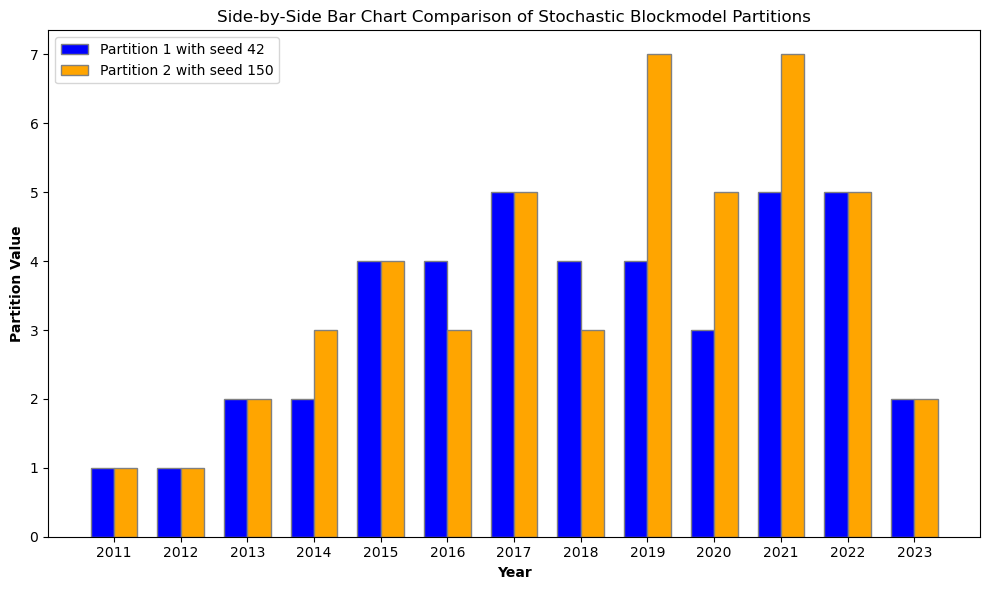

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the dictionaries
dict1 = best_partitions_dict
dict2 = best_partitions_dict_seed_diff


# Extract years and values from dictionaries
years = list(dict1.keys())
values1 = list(dict1.values())
values2 = list(dict2.values())

# Define the width for the bars
bar_width = 0.35

# Set positions for the bars
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create the side-by-side bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, values1, color='blue', width=bar_width, edgecolor='grey', label='Partition 1 with seed 42')
plt.bar(r2, values2, color='orange', width=bar_width, edgecolor='grey', label='Partition 2 with seed 150')

# Add labels
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Partition Value', fontweight='bold')
plt.title('Side-by-Side Bar Chart Comparison of Stochastic Blockmodel Partitions')
plt.xticks([r + bar_width / 2 for r in range(len(years))], years)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
print(best_partitions_dict)

{2011: 1, 2012: 1, 2013: 2, 2014: 3, 2015: 4, 2016: 3, 2017: 5, 2018: 3, 2019: 7, 2020: 5, 2021: 7, 2022: 5, 2023: 2}


In [ ]:
# create graph and details here

# run it multiple times and get details to review workflow

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aaaaf950, at 0x2aaaadb50>

Linking: Can also link the graph to boardex and gvkey tables from raw_data to link with the patent data and annual report data from before!!

### 2. Creating linking table from company network table to Director information

Can use the above dictionary to create whatever structures you need 

Then create a centrality measure below based on the connection.

Melt the graph data for each node for each year to get a director level data

https://chatgpt.com/share/fbd72cf4-19b5-4283-8300-12d964ba1bd3

Allows you to get other scores separately that's it!!

In [31]:
# need to do this at a yearly basis? Need to work from the boardex network directly!!

# then you would break the years, this is fine - just merge with the companies above, need years for each!!

yearly_long_df_lst = []


for year in range(2011, 2023):

    # print(year)

    year_graph_df = get_filtered_graph_data(boardex_company_networks_us_df, year)

    # want the directors for each year so melt it like this!!
    temp = year_graph_df[['boardid', 'companyid', 'directorid']]

    # get the long format

    # Transform the edge list to have one company per row
    df_year_long = pd.melt(temp, id_vars=['directorid'], value_vars=['boardid', 'companyid'],
                    var_name='company_type', value_name='company_id') # make sure a different name to avoid overlap!!
    
    # Drop the 'company_type' as it's no longer needed
    df_year_long = df_year_long.drop('company_type', axis=1)

    # put the year back
    df_year_long["year"]  = year

    yearly_long_df_lst.append(df_year_long)


In [32]:
yearly_long_df_all = pd.concat(yearly_long_df_lst)

yearly_long_df_all.head()

,directorid,company_id,year
0,508389.0,401.0,2011
1,340771.0,401.0,2011
2,340771.0,401.0,2011
3,654834.0,584.0,2011
4,454331.0,584.0,2011


In [33]:
yearly_long_df_all.shape # match each director id for later

(101904, 3)

In [34]:
yearly_long_df_all.to_csv("features/company_network_2011_2023_director_link_company_year.csv")

### Director specific information merge

Merge the data to the director specific employment and education backgrounds tables.

Just do so for each year, and then get the information you need later

Seeded LDA to do the classifications and then run the following after. Yes convert to each year as linking table

But do seeded LDA as required!!

In [ ]:
# # entire code example for use later

# import pandas as pd

# # Sample data for edge list
# data_edge = {
#     'companyidA': ['Comp1', 'Comp2', 'Comp3'],
#     'directorid': ['Dir1', 'Dir2', 'Dir3'],
#     'companyidB': ['Comp4', 'Comp5', 'Comp6']
# }

# # Sample data for director occupation
# data_director = {
#     'directorid': ['Dir1', 'Dir2', 'Dir3'],
#     'occupation': ['Engineer', 'Doctor', 'Artist']
# }

# # Convert dictionaries to DataFrames
# df_edge = pd.DataFrame(data_edge)
# df_director = pd.DataFrame(data_director)

# # Transform the edge list to have one company per row
# df_long = pd.melt(df_edge, id_vars=['directorid'], value_vars=['companyidA', 'companyidB'],
#                   var_name='company_type', value_name='companyid')

# # Drop the 'company_type' as it's no longer needed
# df_long = df_long.drop('company_type', axis=1)

# # Merge the transformed edge list with the occupation table
# df_merged = pd.merge(df_long, df_director, on='directorid', how='left')

# # Display the final DataFrame
# print(df_merged)


Other things ,organisation summary could be useful, network size of the directors